## Film review site bias

To investigate the potential bias that movie reviews site have, FiveThirtyEight compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from Metacritic, Fandango, Rotten Tomatoes, and IMDB review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site.

We'll be working with the `fandango_scores.csv` file, which can be downloaded from the FiveThirtEight Github repo. Here are the columns we'll be working with in this mission:

- `FILM` - film name
- `RT_user_norm` - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
- `Metacritic_user_nom` - average user rating from Metacritic, normalized to a 1 to 5 point scale
- `IMDB_norm` - average user rating from IMDB, normalized to a 1 to 5 point scale
- `Fandango_Ratingvalue` - average user rating from Fandango, normalized to a 1 to 5 point scale
`Fandango_Stars` - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

[Data source](https://github.com/fivethirtyeight/data/tree/master/fandango)


In [1]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [2]:
import pandas as pd

reviews = pd.read_csv('/Users/jake/Dev/data/datasets/fandango_scores.csv')

reviews[:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

The RT_user_norm, Metacritic_user_nom, IMDB_norm, and Fandango_Ratingvalue columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie.

Let's make a new df with just the norm reviews and film.

In [3]:
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]

norm_reviews[:1]

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


Let's generate a bar chart of this film's ratings.

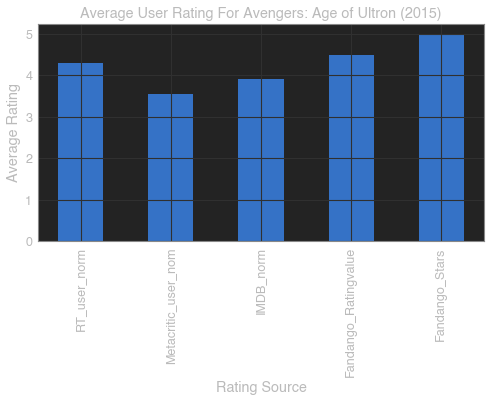

In [20]:
import matplotlib.pyplot as plt
from numpy import arange
fig, ax = plt.subplots(figsize=(8, 4))

# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
bar_positions = arange(5) + 1

# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values

tick_positions = range(1,6)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)

ax.bar(bar_positions, bar_heights, 0.5) # 0.5 = width

ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()